In [1]:
import pandas as pd
import numpy as np

In [22]:
col_names = ['class','age','sex','steroid','antivirals','fatigue','malaise','anorexia','liver big','liver firm','spleen palpable','spiders','ascites','varices','bilirubin','alk phosphate','sgot','albumin','protime','histology']

In [23]:
df = pd.read_csv("hepatitis.csv", names=col_names, na_values='?',sep=',')
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


**Data Preprocessing**

In [4]:
df.shape

(155, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            155 non-null    int64  
 1   age              155 non-null    int64  
 2   sex              155 non-null    int64  
 3   steroid          154 non-null    float64
 4   antivirals       155 non-null    int64  
 5   fatigue          154 non-null    float64
 6   malaise          154 non-null    float64
 7   anorexia         154 non-null    float64
 8   liver big        145 non-null    float64
 9   liver firm       144 non-null    float64
 10  spleen palpable  150 non-null    float64
 11  spiders          150 non-null    float64
 12  ascites          150 non-null    float64
 13  varices          150 non-null    float64
 14  bilirubin        149 non-null    float64
 15  alk phosphate    126 non-null    float64
 16  sgot             151 non-null    float64
 17  albumin         

In [7]:
df.isna().sum()

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver big          10
liver firm         11
spleen palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [8]:
df['steroid'].isna().sum()

1

In [24]:
for col in col_names:
  if(df[col].isna().sum()>0):
    df[col].fillna(df[col].mode()[0],inplace=True)

In [11]:
df.isna().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver big          0
liver firm         0
spleen palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

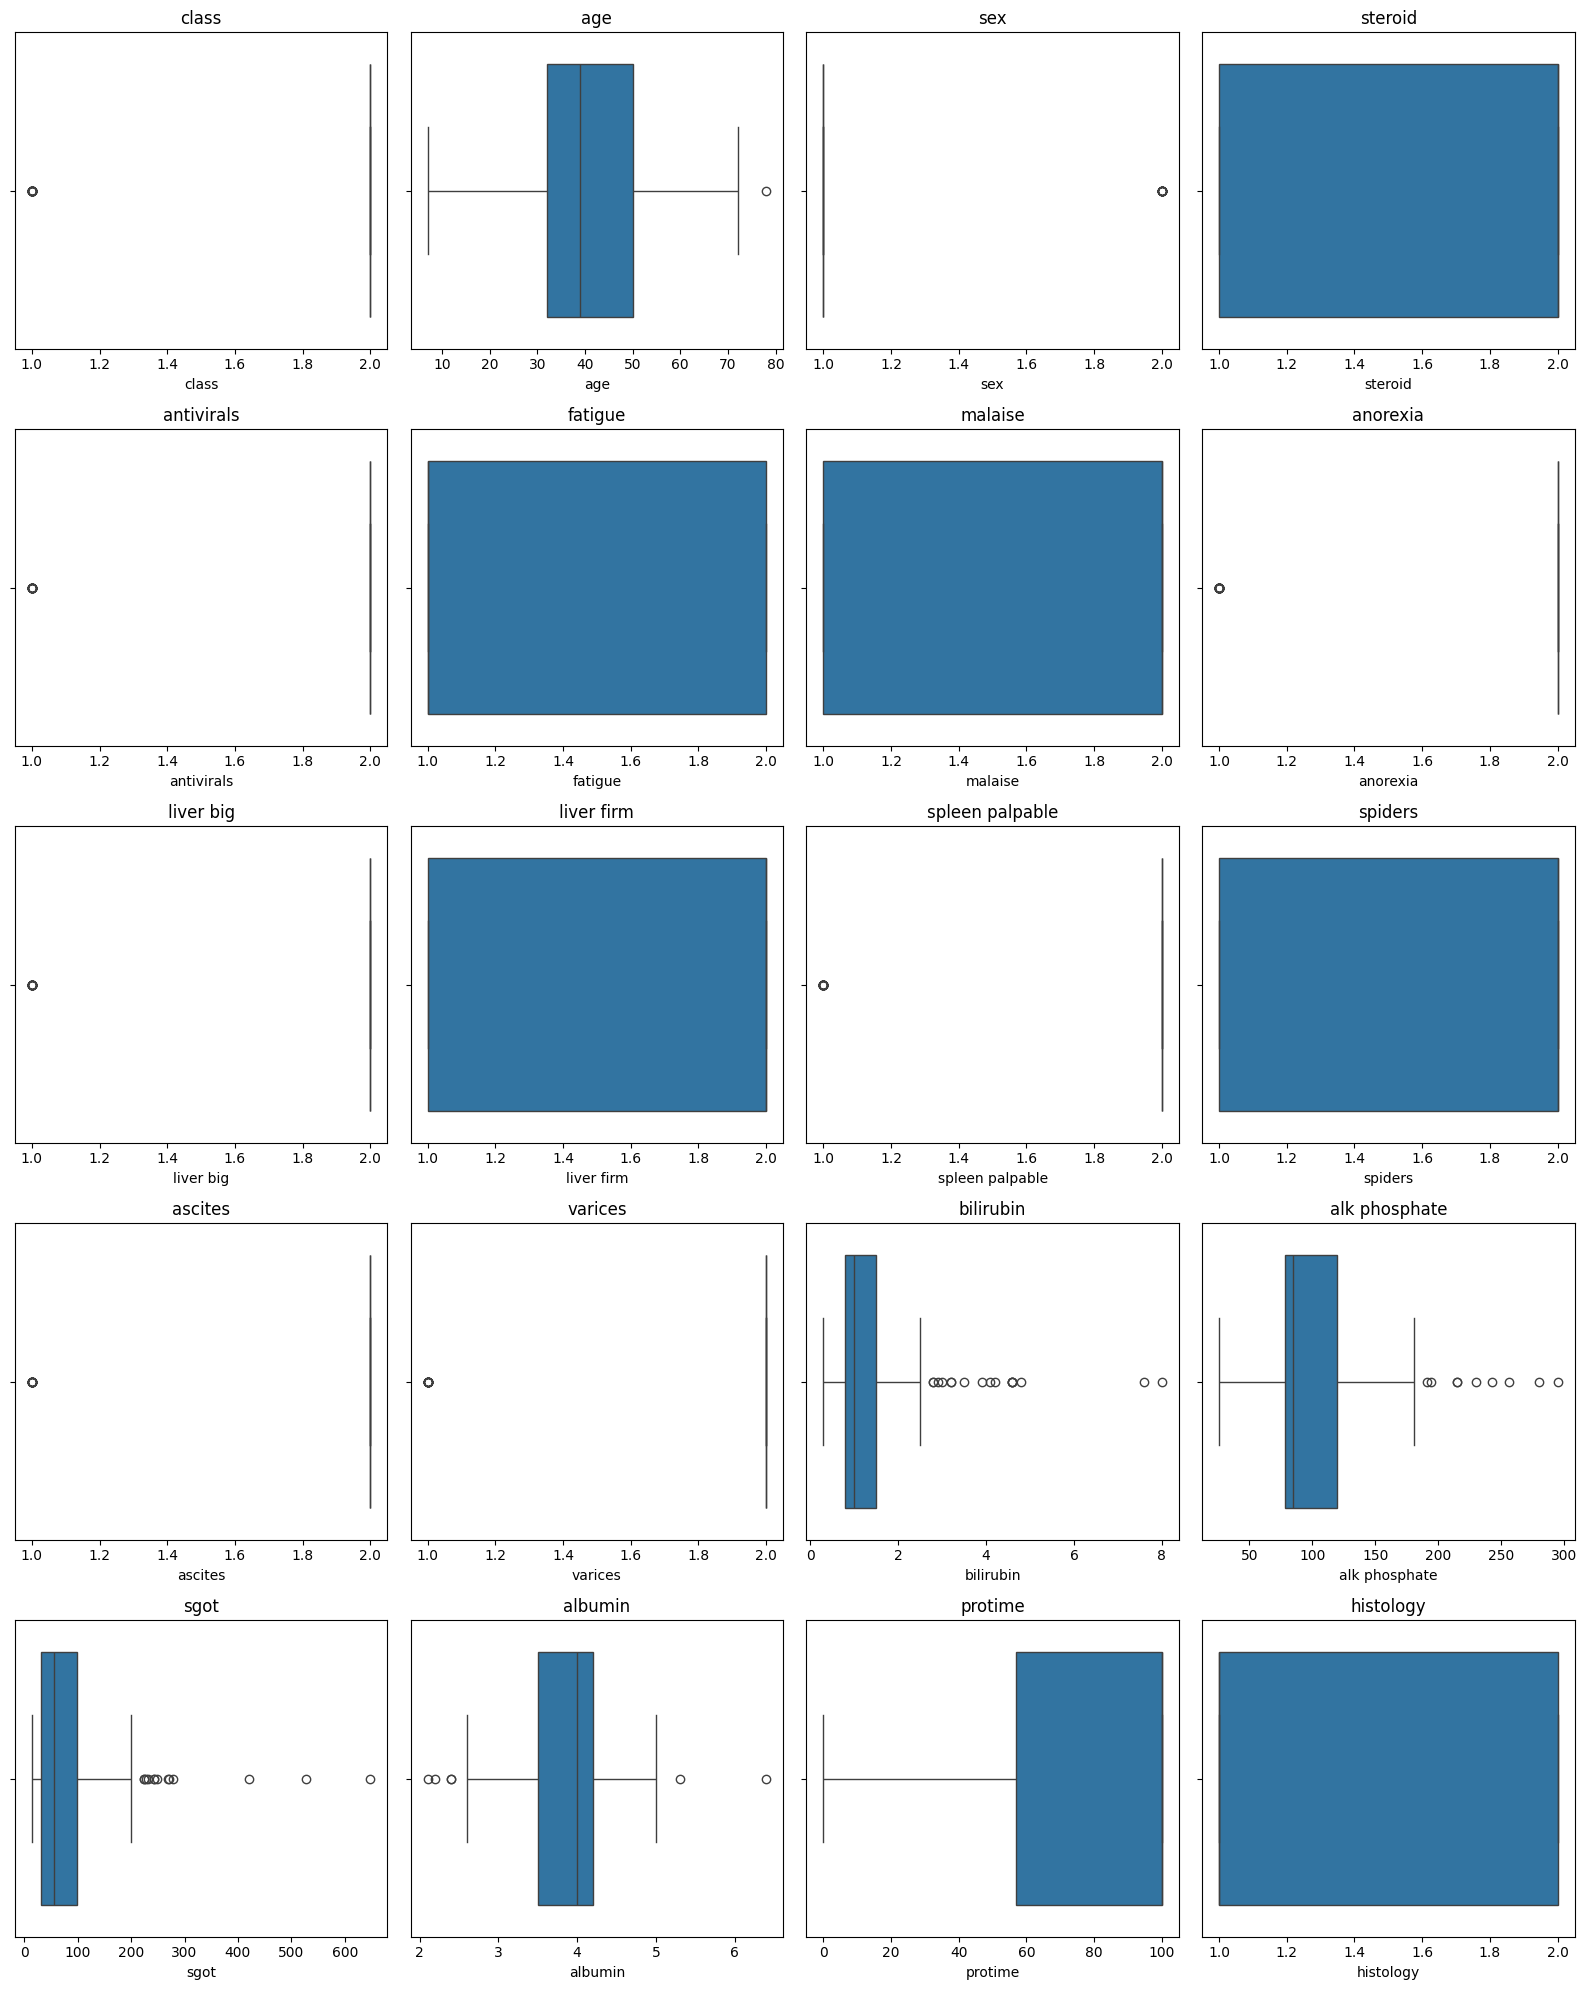

In [25]:
def viewBoxPlots(df):
  numeric_cols = df.select_dtypes(include=['number']).columns
  cols = len(numeric_cols)

  rows = (cols+3) // 4
  cols = min(cols,4)

  fig,axes = plt.subplots(rows,cols, figsize=(16,4*rows))

  if rows > 1:
    axes = axes.flatten()

  for i,col in enumerate(numeric_cols):
    sns.boxplot(x=df[col],ax=axes[i])
    axes[i].set_title(col)

  for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

viewBoxPlots(df)

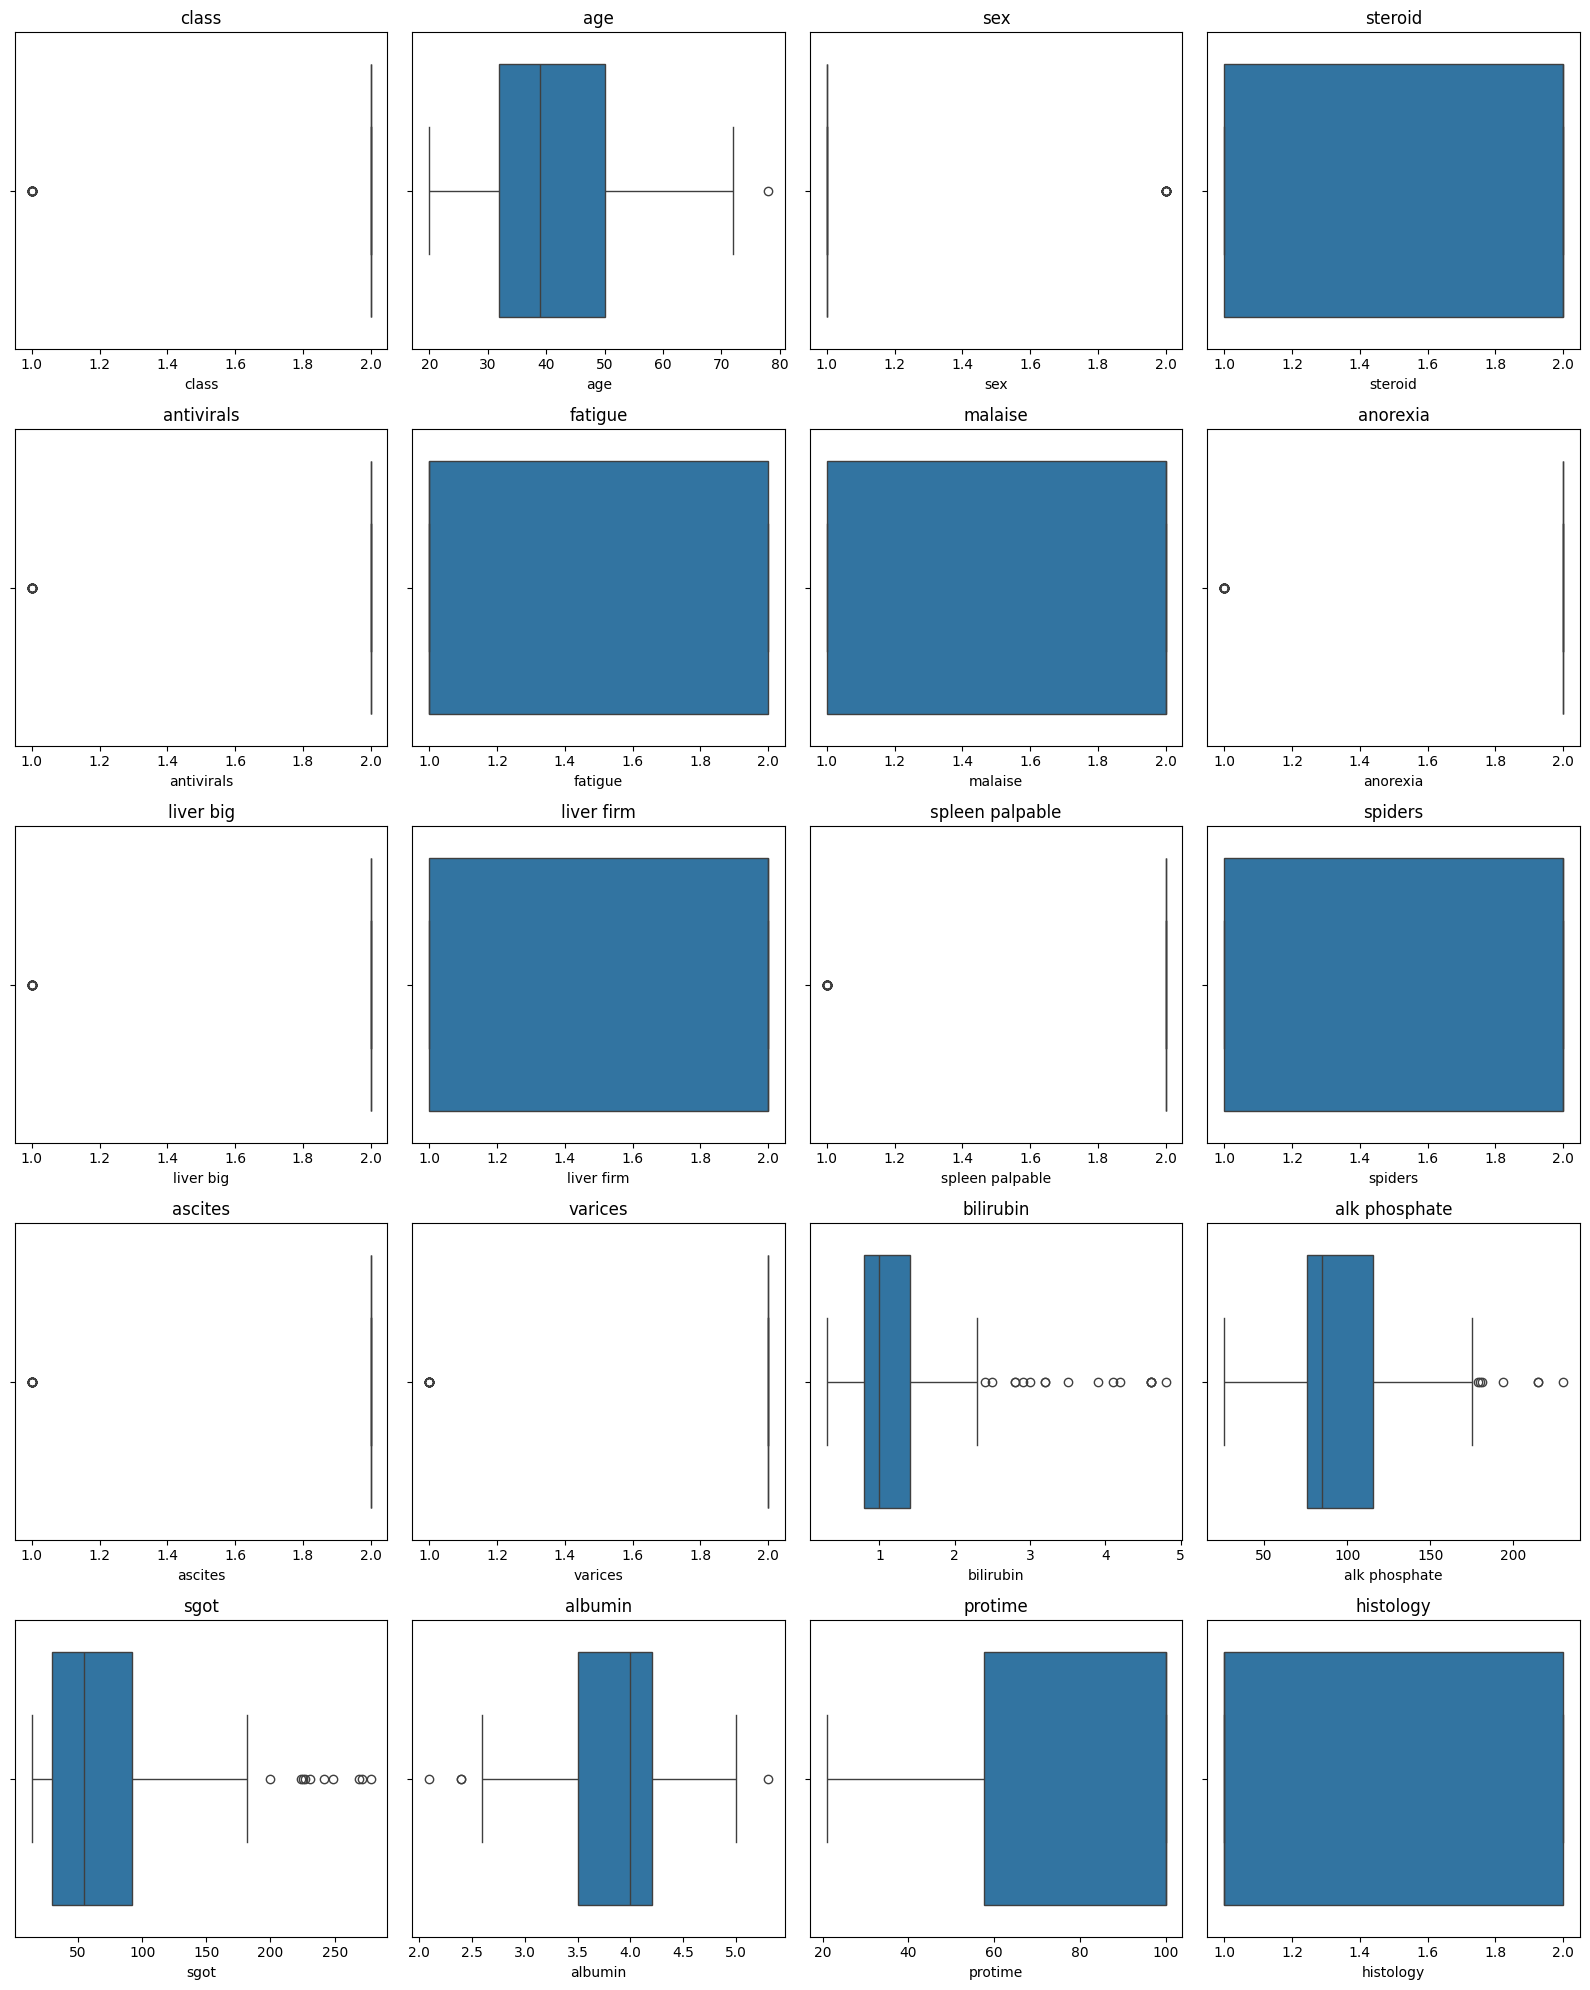

In [27]:
def rem1(df):
  data = df.select_dtypes(include=['number'])
  zscore = np.abs((data-data.mean())/data.std())
  out = zscore > 3
  data = data[~out.any(axis=1)]
  return data

def rem2(df):
  df = df.select_dtypes(include=['number'])
  Q1 = df.quantile(0.25);
  Q2 = df.quantile(0.75);

  IQR = Q2 - Q1;
  lower_t = Q1 - 1.5 * IQR
  upper_t = Q2 + 1.5 * IQR
  df = df[~((df < lower_t) | (df>upper_t)).any(axis=1)]
  return df

df=rem1(df)
viewBoxPlots(df)

In [28]:
df.shape

(144, 20)

**Creating Subsets**

In [29]:
df['sex'].unique()

array([2, 1])

In [30]:
df1 = df[(df['sex']==1)]
df1.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,100.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,100.0,1
3,2,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,100.0,1
5,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1


In [33]:
df2 = df[(df['sex']==2)]
df2.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,100.0,1
20,2,22,2,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,48.0,20.0,4.2,64.0,1
24,2,25,2,1.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.4,45.0,18.0,4.3,70.0,1
27,2,58,2,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.4,175.0,55.0,2.7,36.0,1
32,2,41,2,2.0,1,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,81.0,53.0,5.0,74.0,1


**Merging Two Subsets**

In [34]:
df_merged = pd.concat([df1,df2])
df_merged

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,100.0,1
20,2,22,2,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,48.0,20.0,4.2,64.0,1
24,2,25,2,1.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.4,45.0,18.0,4.3,70.0,1
27,2,58,2,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.4,175.0,55.0,2.7,36.0,1
32,2,41,2,2.0,1,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,81.0,53.0,5.0,74.0,1
33,2,26,2,1.0,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.5,135.0,29.0,3.8,60.0,1
37,2,20,2,1.0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.3,150.0,68.0,3.9,100.0,1
59,2,45,2,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,85.0,75.0,4.0,100.0,1
77,2,34,2,1.0,1,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.6,30.0,24.0,4.0,76.0,1
83,2,67,2,1.0,2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.5,179.0,69.0,2.9,100.0,1


**Sorting**

In [35]:
sortAge = df.sort_values(by=['age'])
sortAge

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
148,2,20,1,1.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,89.0,152.0,4.0,100.0,2
37,2,20,2,1.0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.3,150.0,68.0,3.9,100.0,1
121,2,20,1,1.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,160.0,118.0,2.9,23.0,2
101,2,22,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,85.0,24.0,4.0,100.0,2
20,2,22,2,2.0,1,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,48.0,20.0,4.2,64.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,2,66,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,102.0,53.0,4.3,100.0,1
83,2,67,2,1.0,2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.5,179.0,69.0,2.9,100.0,1
115,2,69,2,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.2,119.0,136.0,4.0,100.0,2
133,2,72,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,115.0,52.0,3.4,50.0,2


In [36]:
sortSgot = df.sort_values(by=['sgot'])
sortSgot

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
80,2,23,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.8,85.0,14.0,4.8,100.0,1
38,2,42,1,1.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,14.0,4.0,100.0,1
68,2,39,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,34.0,15.0,4.0,54.0,1
88,1,38,1,1.0,2,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.2,118.0,16.0,2.8,100.0,2
41,2,23,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.6,56.0,16.0,4.6,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1,58,1,2.0,2,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,167.0,242.0,3.3,100.0,1
11,2,32,1,2.0,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1
103,2,51,1,1.0,2,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,4.6,215.0,269.0,3.9,51.0,2
72,2,51,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,76.0,271.0,4.4,100.0,1


In [37]:
sortProtime = df.sort_values(by=['protime'])
sortProtime

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
40,2,52,1,1.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,75.0,55.0,4.0,21.0,1
121,2,20,1,1.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,160.0,118.0,2.9,23.0,2
62,2,32,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,3.5,215.0,54.0,3.4,29.0,1
111,1,42,1,1.0,1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.5,62.0,68.0,3.8,29.0,2
129,1,57,1,1.0,2,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,4.6,82.0,55.0,3.3,30.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,2,49,1,1.0,1,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,0.6,85.0,48.0,3.7,100.0,1
74,2,50,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.5,100.0,100.0,5.3,100.0,1
28,2,61,1,1.0,2,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,25.0,3.8,100.0,1
71,1,34,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.8,127.0,182.0,4.0,100.0,1


**Transposing Data**

In [39]:
df_transposed = df.transpose()
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,148,149,151,152,153,154
class,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
age,30.0,50.0,78.0,31.0,34.0,34.0,51.0,23.0,39.0,30.0,...,49.0,45.0,31.0,41.0,20.0,36.0,44.0,61.0,53.0,43.0
sex,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
steroid,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
antivirals,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
fatigue,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0
malaise,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
anorexia,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
liver big,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
liver firm,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0


**Melting Data**

In [41]:
df_melted = pd.melt(df, id_vars=['age','sex'], var_name='Metrics',value_name='Values')
df_melted

,age,sex,Metrics,Values
0,30,2,class,2.0
1,50,1,class,2.0
2,78,1,class,2.0
3,31,1,class,2.0
4,34,1,class,2.0
...,...,...,...,...
2587,36,1,histology,2.0
2588,44,1,histology,2.0
2589,61,1,histology,2.0
2590,53,2,histology,2.0


**Casting data**

In [43]:
df_casted = df_melted.pivot_table(index=['age','sex'],columns='Metrics',values='Values')
df_casted

Metrics   albumin  alk phosphate  anorexia  antivirals   ascites  bilirubin  \
age sex                                                                       
20  1    3.450000     124.500000  1.500000    2.000000  1.500000   0.950000   
    2    3.900000     150.000000  1.000000    2.000000  2.000000   2.300000   
22  1    4.000000      85.000000  2.000000    2.000000  2.000000   0.700000   
    2    4.200000      48.000000  2.000000    1.000000  2.000000   0.900000   
23  1    4.375000     105.000000  1.500000    2.000000  2.000000   1.925000   
24  1    4.200000      83.500000  2.000000    2.000000  2.000000   0.900000   
25  1    4.500000     181.000000  2.000000    2.000000  1.000000   1.300000   
    2    4.300000      45.000000  2.000000    1.000000  2.000000   0.400000   
26  2    3.800000     135.000000  2.000000    2.000000  2.000000   0.500000   
27  1    3.775000     120.250000  1.750000    2.000000  2.000000   1.300000   
28  1    4.325000      72.000000  1.500000    2.000000  1.750000   1.000000   
30  1    3.942857      93.714286  1.857143    1.857143  1.857143   1.228571   
    2    4.000000      85.000000  2.000000    2.000000  2.000000   1.000000   
31  1    4.066667      68.666667  2.000000    1.666667  2.000000   0.966667   
32  1    3.800000     107.750000  1.750000    1.500000  2.000000   1.550000   
33  1    3.800000      64.666667  2.000000    2.000000  1.666667   0.900000   
34  1    4.066667      91.500000  2.000000    2.000000  2.000000   1.283333   
    2    4.050000      50.000000  1.500000    1.500000  2.000000   0.650000   
35  1    3.450000      98.000000  2.000000    2.000000  1.500000   1.200000   
36  1    3.800000     109.500000  1.833333    2.000000  2.000000   0.816667   
37  1    4.160000      70.000000  1.800000    2.000000  2.000000   0.720000   
38  1    3.728571      92.000000  1.428571    1.714286  1.714286   1.071429   
39  1    4.160000      73.400000  2.000000    1.800000  2.000000   0.980000   
40  1    4.066667      62.333333  1.666667    1.333333  2.000000   0.800000   
41  1    3.650000      73.000000  2.000000    1.500000  2.000000   2.550000   
    2    5.000000      81.000000  1.000000    1.000000  2.000000   0.700000   
42  1    3.960000      75.400000  1.800000    1.800000  2.000000   1.700000   
43  1    3.100000     100.000000  2.000000    2.000000  1.000000   1.200000   
44  1    3.980000     110.600000  2.000000    2.000000  2.000000   1.400000   
45  1    3.200000      83.666667  1.666667    1.666667  1.666667   1.466667   
    2    4.000000      85.000000  2.000000    2.000000  2.000000   1.000000   
47  1    3.225000     105.250000  2.000000    1.750000  1.500000   1.425000   
48  1    3.250000     140.500000  1.500000    2.000000  1.500000   3.400000   
49  1    3.566667      91.000000  1.666667    1.666667  2.000000   0.933333   
50  1    3.820000     122.800000  2.000000    2.000000  1.800000   1.440000   
    2    3.400000     230.000000  2.000000    2.000000  2.000000   0.900000   
51  1    4.066667     104.000000  1.500000    1.833333  2.000000   1.550000   
52  1    3.633333      81.666667  2.000000    1.666667  2.000000   1.066667   
53  2    4.100000      81.000000  2.000000    2.000000  2.000000   1.500000   
54  1    3.500000     111.250000  2.000000    1.750000  1.500000   2.325000   
56  1    3.800000      74.333333  1.666667    2.000000  2.000000   1.433333   
57  1    2.950000      83.500000  1.500000    2.000000  1.000000   4.350000   
58  1    3.300000     167.000000  2.000000    2.000000  2.000000   2.000000   
    2    2.700000     175.000000  2.000000    2.000000  2.000000   1.400000   
59  1    3.600000     107.000000  2.000000    2.000000  2.000000   1.500000   
60  1    4.000000      85.000000  2.000000    2.000000  2.000000   1.000000   
61  1    3.966667      79.333333  2.000000    2.000000  2.000000   1.033333   
62  1    4.000000      85.000000  2.000000    2.000000  2.000000   1.000000   
    2    3.900000     141.000000  2.000000    2.00

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [45]:
df['class'].unique()

array([2, 1])

In [47]:
le =LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [48]:
df['class'].unique()

array([1, 0])

In [49]:
df['sex'].unique()

array([2, 1])

In [50]:
df['sex'] = le.fit_transform(df['sex'])

In [51]:
df['sex'].unique()

array([1, 0])

In [52]:
x = df.drop('class', axis=1)
y = df['class']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [55]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
lr_pred = lr.predict(x_test)

In [57]:
lr_acc = accuracy_score(y_test,lr_pred)

In [58]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [59]:
nb_pred = nb.predict(x_test)

In [60]:
nb_acc = accuracy_score(y_test,nb_pred)

In [61]:
print("Accuracy by Logistic Regression is: ",lr_acc)
print("Accuarcy by Naive Bayes is: ",nb_acc)

Accuracy by Logistic Regression is:  0.9444444444444444
Accuarcy by Naive Bayes is:  0.8611111111111112
